#Campus Recruitment Prediction With Machine Learning for MBA Students


 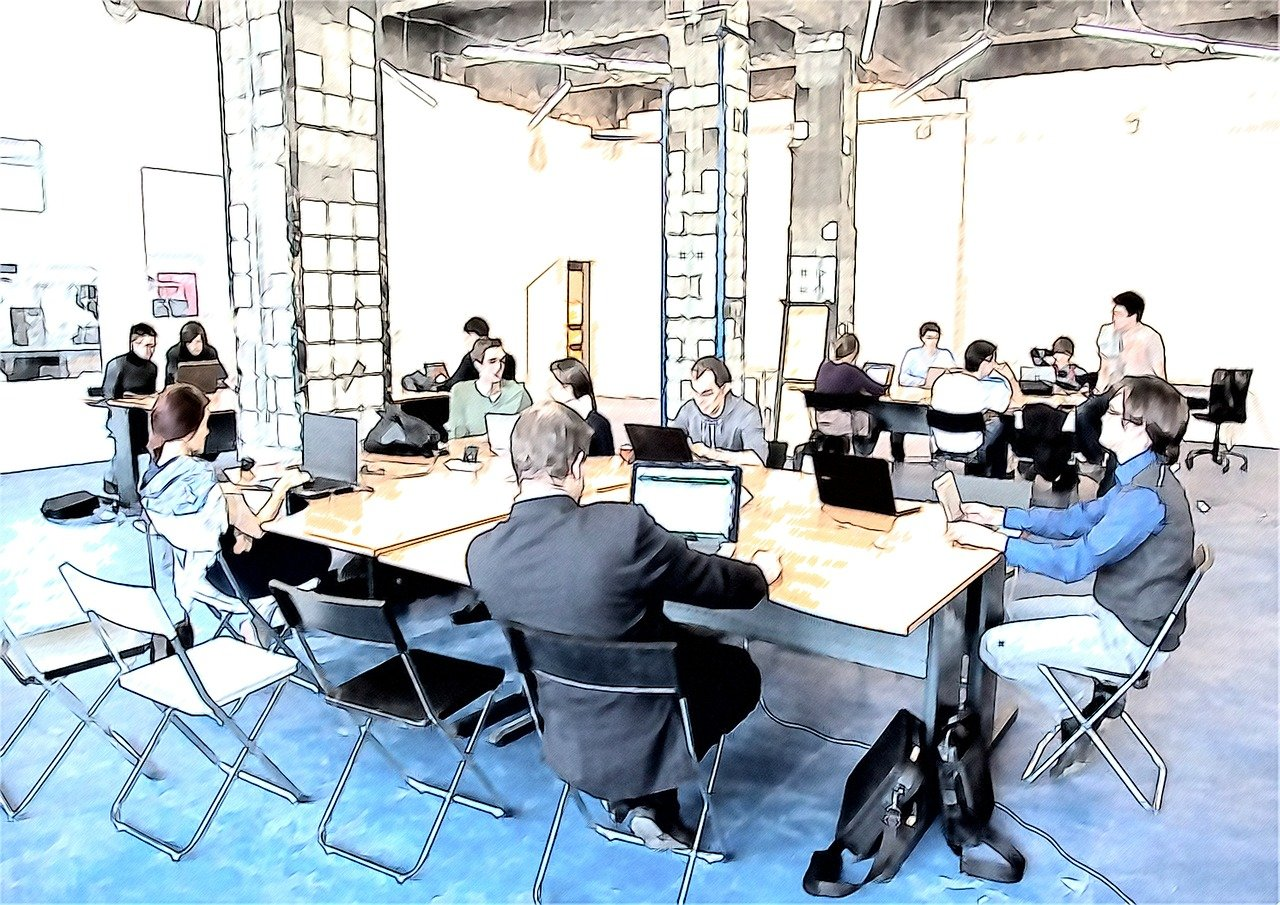

**Student Name: GIMNADHI P.M.T**.<br>
**Registration Number: EG/2020/3942** <br>

In this project we are going to utilize the **Campus Recruitment** Dataset from Kaggle which consisit of various features which might influence the Placement of Student in Jobs.

Data Link: https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement/data

There are alltogether 14 features and the target variable (Status). A description of the target dataset features have been provided below.

* sl_no:Serial Number
* gender: Gender- Male='M',Female='F'
* ssc_p: Secondary Education percentage- 10th Grade
* ssc_b: Board of Education- Central/ Others
* hsc_p: Higher Secondary Education percentage- 12th Grade
* hsc_b: Board of Education- Central/ Others
* hsc_s: Specialization in Higher Secondary Education
* degree_p: Degree Percentage
* degree_t: Under Graduation(Degree type)- Field of degree education
* workex: Work Experience
* etest_p: Employability test percentage (conducted by college)
* specialisation: Post Graduation(MBA)- Specialization
* mba_p: MBA percentage
* status: Status of placement- Placed/Not placed
* salary: Salary offered by corporate to candidates

So, in this task, we are starting with the Exploratory Data Analysis (EDA) and progress towards the data preprocessing and finally implementing machine learning models to predict student placements in corporations.

**Please take the following points into consideration while completing the assignment and during the submission**

1. It is recommended to use Google Colab or Jupyer notebook (hosted in anaconda framework) to complete this assignment.
2. Submit the downloaded Jupyter notebook (.ipynb) from the Colab or Jupyter notebook along with results on or before the deadline (Results including plots, tables/dataframes, printed values and text explanations should be visible along with your code. If you are fail to save the document in such a way no marks will be given for such sections). **Furthermore, assignments subitted after the deadline will not consider for grading**.
3. In adddition to that submit the generated .pdf file of the notebook after running all the code blocks (Hint: If colab shows distortions in the generated pdf try to generate the pdf with Jupyter Notebook in Anaconda; makesure that your comments are completely visible).
4. Results and explanations should be clearly visible in both documents.
5. You should submit a .zip file with .ipynb file and .pdf file of the notebook.
6. Rename the zipfile as **EE5253_Assignment_EG20YYXXXX** (YY = Registration Year, XXXX = Student Registration Number)


**Note: Each plot in this assigment needs to be formatted in proper way (i.e., plot titles, axis titles, etc. should be added accordingly)**

## Load the Necessary Libraries

In [102]:
# Load the necessary libraries here
# If you are not sure what to be impored at the moment please start proceding with the upcoming tasks and import the libraries later
# according to the requirements

# Hint: You may need matplotlib and seaborn libraries for data visualization
# Hint: Think about what the libraries need in order to load a .csv file and process it

# Your code goes here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

## Data Loading

In [103]:
# Add the dataset into the Colab runtime and load the dataset as a Pandas dataframe.
# If you are running jupyer notebook in your local anaconda virtual environment provide the correct path to
# load the data.

# Your code goes here
from google.colab import files
uploaded = files.upload()


Saving Placement_Data_Full_Class.csv to Placement_Data_Full_Class.csv


In [104]:
# Print the first five rows of the loaded dataframe

# Your code goes here
df = pd.read_csv(io.BytesIO(uploaded['Placement_Data_Full_Class.csv']))
print(df.head())

   sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  


In [105]:
# Since the sl_no feature just indicating the index of the each data point you may drop the column

# Your code goes here
df.drop('sl_no', axis=1, inplace=True)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## Exploratory Data Analysis (EDA)

In [106]:
# Identify the shape of the loaded dataframe

# Your code goes here
df_shape = df.shape
print("Shape of the Data Frame:", df_shape)

Shape of the Data Frame: (215, 14)


In [107]:
# Print a concise summary of the pandas dataframe

# Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

# Your code goes here
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


**Q:** Based on the printed summary identify what are the categorical and numerical features of the dataset. Please note them down below. <br>
> **A: Categorical Features**<br>
>>1.gender<br>
2.ssc_b (Board of Education for Secondary Education)<br>
3.hsc_b (Board of Education for Higher Secondary Education)<br>
4.hsc_s (Specialization in Higher Secondary Education)<br>
5.degree_t (Under Graduation - Field of degree education)<br>
6.workex (Work Experience)<br>
7.specialisation (Post Graduation (MBA) - Specialization)<br>
8.status (Status of placement)<br>

>**B: Numerical Features**
>>1.ssc_p (Secondary Education percentage - 10th Grade)<br>
2.hsc_p (Higher Secondary Education percentage - 12th Grade)<br>
3.degree_p (Degree Percentage)<br>
4.etest_p (Employability test percentage)<br>
5.mba_p (MBA percentage)<br>
6.salary (Salary offered by corporate to candidates)<br>

In [108]:
# Generate descriptive analytics for the numerical features in the dataset

# Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

# Your code goes here
numerical_describe = df.describe()
# Display the descriptive analytics
numerical_describe

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


### Data Visualization



In the following section we are going to do some visualization in the dataset.

**Q:**In this case we are going to split the dataset into train and test sets and utilize only the train set for the visualizations. What should be the reason?<br>
> **A:** We divided the dataset into two parts: one for teaching the model and one for testing it. This way, the graphs we make only show what the model has learned during practice. We don't want to confuse the model by showing it new information during the test. It's like seeing things from the model's point of view while it's still learning.

In [109]:
# Split the dataset into train and test sets
# Make sure to separate independent and dependent variables as well

# Your code goes here
from sklearn.model_selection import train_test_split

# Separate independent variables (X) and dependent variable (y)
X = df.drop('status', axis=1)  # Independent variables
y = df['status']  # Dependent variable

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (172, 13) (172,)
Test set shape: (43, 13) (43,)


In [110]:
# Print number of training data points

# Your code goes here
training_points = len(X_train)
print("Number of Training Data Points:", training_points)

Number of Training Data Points: 172


In [111]:
# Print number of testing data points

# Your code goes here
testing_points = len(X_test)
print("Number of Testing Data Points:", testing_points)

Number of Testing Data Points: 43


<ipython-input-112-a43cb9d26583>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='status', data=df, palette=['pink', 'cyan'])


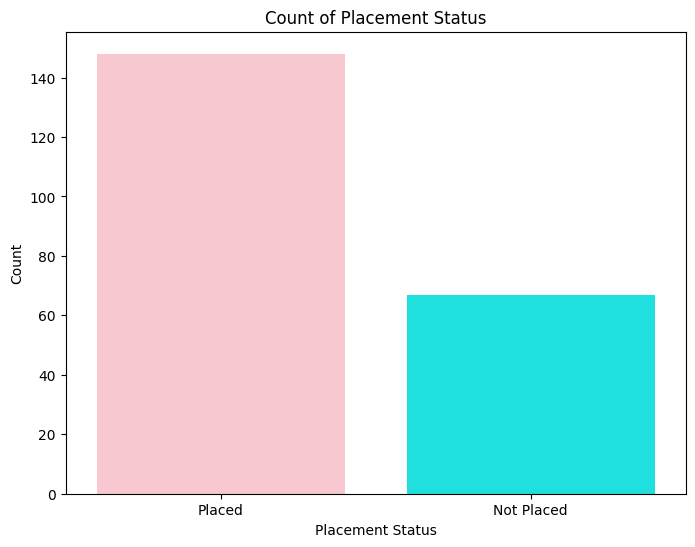

In [112]:
# Print the counts of status (the target variable) using seaborn countplot
# Hint: https://seaborn.pydata.org/generated/seaborn.countplot.html

# Your code goes here
plt.figure(figsize=(8, 6))
sns.countplot(x='status', data=df, palette=['pink', 'cyan'])
plt.title('Count of Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('Count')
plt.show()


**Q:** Can you recognize that the dataset is imbalnaced? Mention three problems of imbalnced dataset may cause during the machine learning model traning. <br>
> **A:** <br>
1. Biased Model Performance: When datasets are imbalanced, it can cause the model to favor the bigger group and not do well with the smaller group. This means the model might be good at predicting the common stuff but not so good at the less common things. It's like focusing on the popular things and ignoring the less popular ones, which can make the predictions inaccurate for those less common cases. <br> <br>
2. Misleading Evaluation Metrics: Using traditional accuracy to judge how well a model works on imbalanced datasets might not be the best idea. Imagine a situation where a model always predicts the most common thing - it might still score high accuracy, but it won't be good at predicting the less common stuff. <br> <br>
3. Model Generalization Issues: When datasets have very unequal amounts of different types of data, it can make it hard for models to learn and understand all the different types well. This is especially true for the group with less data. The model might not learn enough about this smaller group, so it won't be able to make good predictions for it.<br>



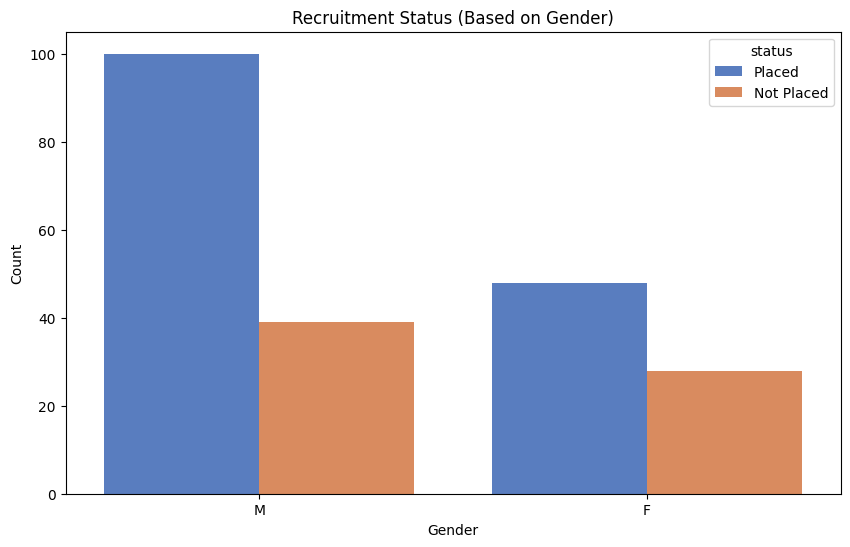

In [113]:
# Plot the recruiment status of the population based on Gender
# Hint: Set the hue parameter accordingly

# Your code goes here
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='status', data=df, palette='muted')
plt.title('Recruitment Status (Based on Gender)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

**Q:** Explain the observation from the above table.
> **A:** The countplot indicates that there are more males who got placed compared to females in the dataset. It seems like there's a bias towards males when it comes to getting placed, as they have more placements than females.

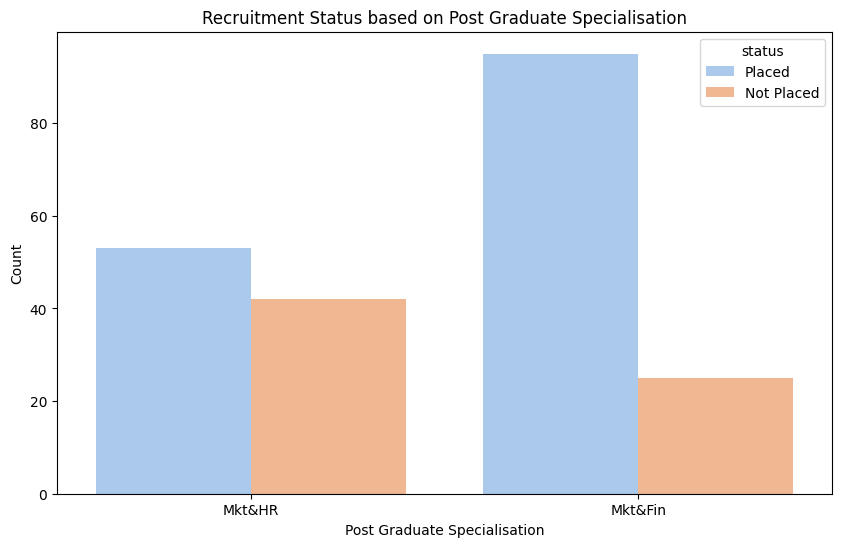

In [114]:
# Plot the recruiment status of the population based on the post gradute specialisation

# Your code goes here
plt.figure(figsize=(10, 6))
sns.countplot(x='specialisation', hue='status', data=df, palette='pastel')
plt.title('Recruitment Status based on Post Graduate Specialisation')
plt.xlabel('Post Graduate Specialisation')
plt.ylabel('Count')
plt.show()

**Q:** Inteprete the above results.
> **A:** The countplot shows that more candidates who specialized in 'Mkt&Fin' (Marketing and Finance) got placed compared to those with 'Mkt&HR' (Marketing and Human Resources) specialization. It seems like 'Mkt&Fin' candidates generally have better chances of getting placed according to the data.

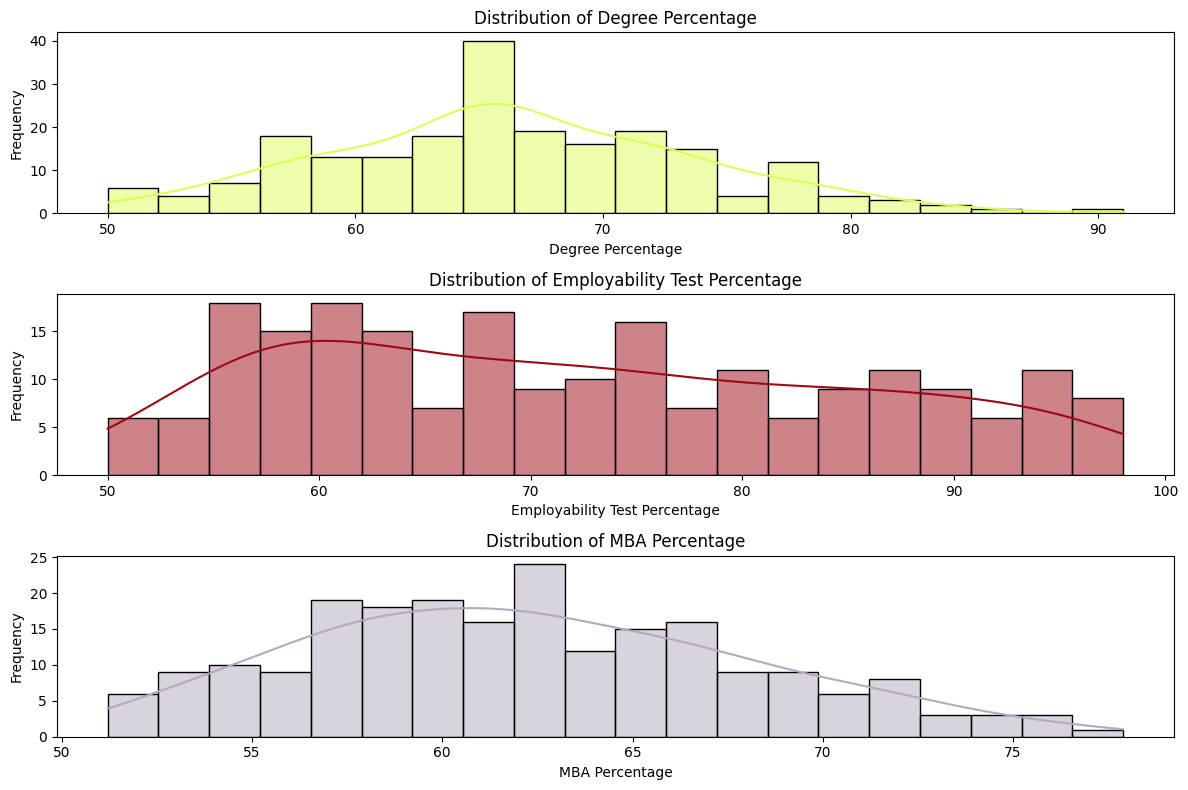

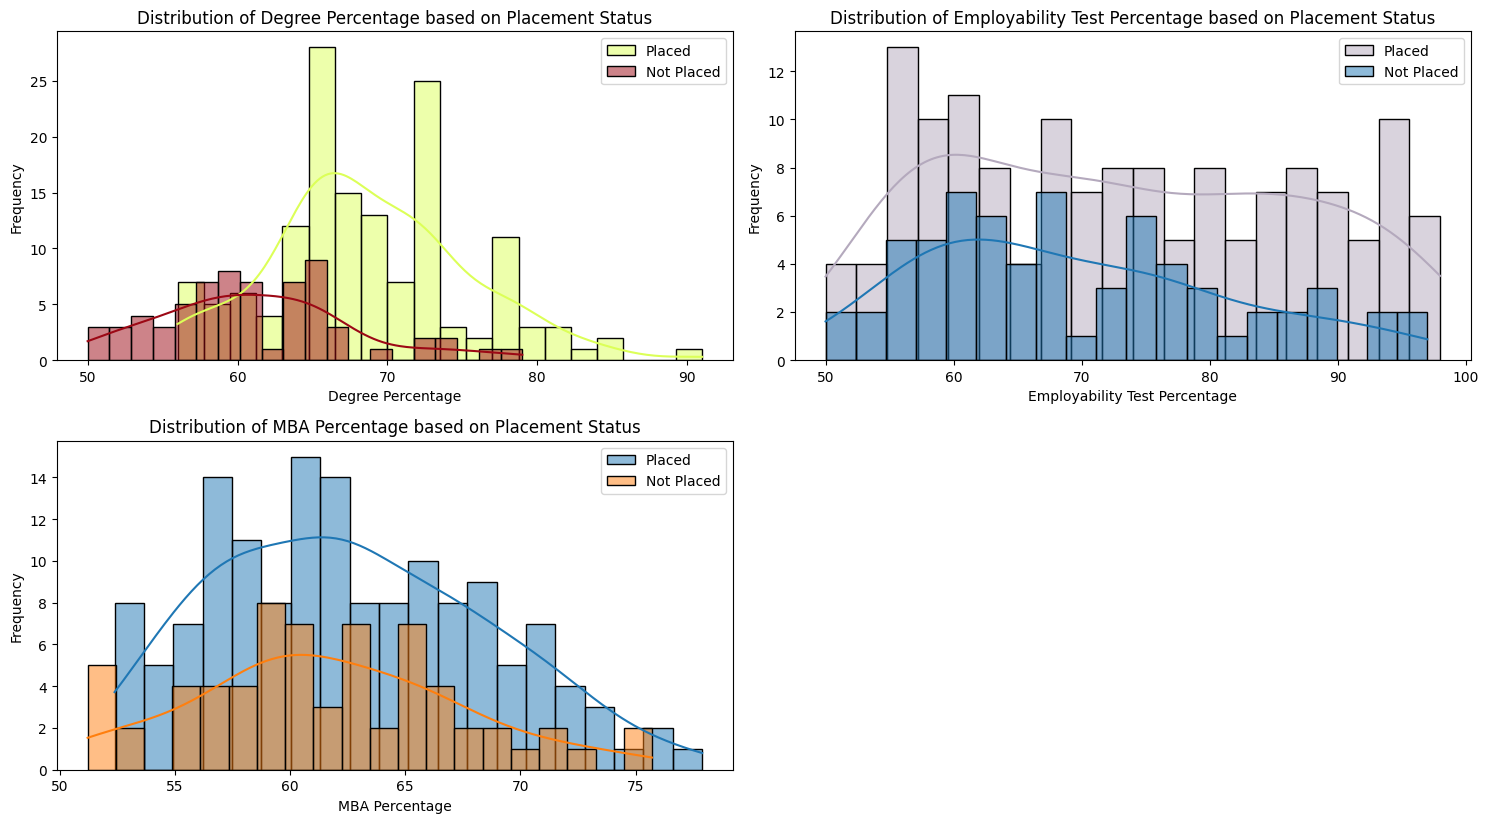

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate random colors
colors = ['#' + ''.join([np.random.choice(list('0123456789ABCDEF')) for j in range(6)]) for i in range(3)]

# Plot the distribution of degree percentage, employability test percentage, and MBA percentage
plt.figure(figsize=(12, 8))

# Degree Percentage Histogram
plt.subplot(3, 1, 1)
sns.histplot(df['degree_p'], bins=20, kde=True, color=colors[0])
plt.title('Distribution of Degree Percentage')
plt.xlabel('Degree Percentage')
plt.ylabel('Frequency')

# Employability Test Percentage Histogram
plt.subplot(3, 1, 2)
sns.histplot(df['etest_p'], bins=20, kde=True, color=colors[1])
plt.title('Distribution of Employability Test Percentage')
plt.xlabel('Employability Test Percentage')
plt.ylabel('Frequency')

# MBA Percentage Histogram
plt.subplot(3, 1, 3)
sns.histplot(df['mba_p'], bins=20, kde=True, color=colors[2])
plt.title('Distribution of MBA Percentage')
plt.xlabel('MBA Percentage')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Add separate column to the subplots and plot same figures based on the placement state
# Make sure to plot all six plots in the same figure.

# Your code goes here
# Plot the distribution of degree percentage, employability test percentage, and MBA percentage based on placement status
plt.figure(figsize=(15, 12))

# Degree Percentage Histogram - Placement Status
plt.subplot(3, 2, 1)
sns.histplot(df[df['status'] == 'Placed']['degree_p'], bins=20, kde=True, color=colors[0], label='Placed')
sns.histplot(df[df['status'] == 'Not Placed']['degree_p'], bins=20, kde=True, color=colors[1], label='Not Placed')
plt.title('Distribution of Degree Percentage based on Placement Status')
plt.xlabel('Degree Percentage')
plt.ylabel('Frequency')
plt.legend()

# Employability Test Percentage Histogram - Placement Status
plt.subplot(3, 2, 2)
sns.histplot(df[df['status'] == 'Placed']['etest_p'], bins=20, kde=True, color=colors[2], label='Placed')
sns.histplot(df[df['status'] == 'Not Placed']['etest_p'], bins=20, kde=True, label='Not Placed')
plt.title('Distribution of Employability Test Percentage based on Placement Status')
plt.xlabel('Employability Test Percentage')
plt.ylabel('Frequency')
plt.legend()

# MBA Percentage Histogram - Placement Status
plt.subplot(3, 2, 3)
sns.histplot(df[df['status'] == 'Placed']['mba_p'], bins=20, kde=True, label='Placed')
sns.histplot(df[df['status'] == 'Not Placed']['mba_p'], bins=20, kde=True, label='Not Placed')
plt.title('Distribution of MBA Percentage based on Placement Status')
plt.xlabel('MBA Percentage')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


**Q:** Summarize the visualizations in the above six plots.<br>
> **A: Degree Percentage Distribution**
>> *   Placed candidates usually have higher degree percentages than non-placed candidates.
*   Non-placed candidates have a wider range of degree percentages.

> **B: Employability Test Percentage Distribution**
>> *   Both placed and non-placed candidates have similar distributions of employability test percentages.
*   Placed candidates tend to have slightly higher test percentages.

> **C: MBA Percentage Distribution**
>> *   Placed candidates generally have a wider spread of MBA percentages.
*  Non-placed candidates are more concentrated in the lower MBA percentage range.



In [116]:
# Check for the null values in train set

# Your code goes here
null_values_train = X_train.isnull().sum()
null_values_train

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            55
dtype: int64

In [117]:
# Check for the null values in test set

# Your code goes here
null_values_test = X_test.isnull().sum()
null_values_test

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            12
dtype: int64

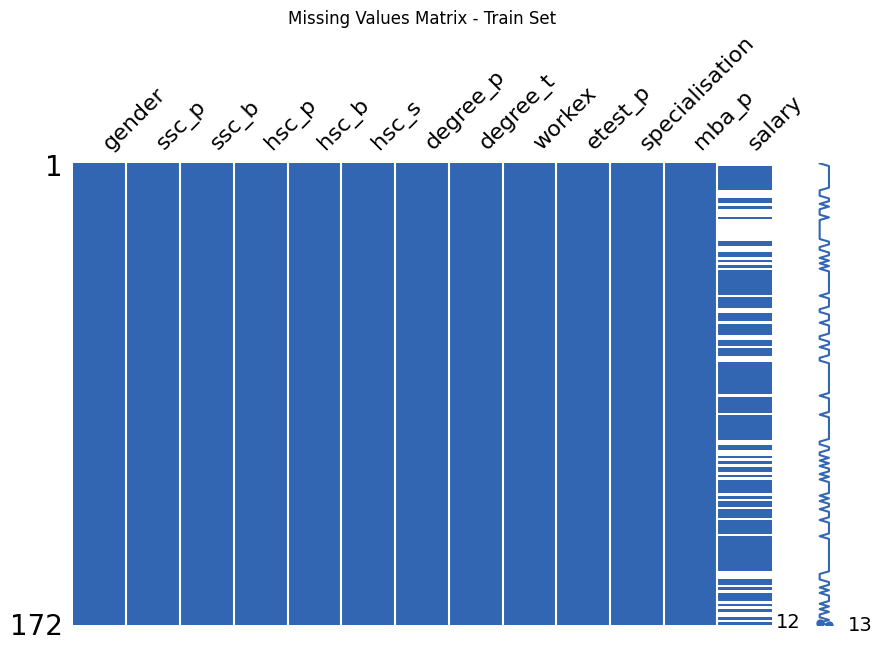

In [118]:
# Display the missing values in the train set using matrix plot
# Hint: https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009
# import Libraries
import missingno as msno

# Your code goes here
msno.matrix(X_train, figsize=(10, 6), color=(0.2, 0.4, 0.7))
plt.title('Missing Values Matrix - Train Set')
plt.show()

## Data Preprocessing

### Handle the Missing Data

**Q:**Given the task "Prediction of Placements of Campus Students (Target Variable: status - Status of placement- Placed/Not placed)" propose a method to handle the missing data in this problem and implement that accordingly. Defend your proposed method for handling the missing data (**Hint:** Observe the matrix plot generated above identify where these missing values are located).
> **A:** Many missing values are in the 'salary' column, probably because students who weren't placed ('Not Placed') didn't receive a salary offer. So, we can replace these missing values with zero to show there was no salary for non-placed students. This way, we're not guessing numbers and it matches the situation where non-placed students wouldn't have salary info. Also, it keeps the data fair by not using a made-up value that's not in the real data.


In [119]:
# Handle the missing data

# Your code goes here
# Fill missing values in 'salary' column with zero in train and test sets
X_train['salary'].fillna(0, inplace=True)

In [120]:
# Test the training dataset after processing the null values

# Your code goes here
null_values_train_after = X_train.isnull().sum()
null_values_train_after

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
salary            0
dtype: int64

In [121]:
# Process the null values in the test set

# Your code goes here
X_test['salary'].fillna(0, inplace=True)

In [122]:
# Test the testing dataset after processing the null values

# Your code goes here
null_values_test_after = X_test.isnull().sum()
null_values_test_after

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
salary            0
dtype: int64

### Handle the categorical features

**Q:** Select an appropriate method to encode the categorical features. Explain your selection and incorporated methodology to be followed in categorical feature handling (i.e., if you are going to use some specific parameters or techniques reason about them accordingly).
> **A: One-Hot encoding** </br>
> One-hot encoding is used because it treats all categories equally, which is great for things like 'gender,' 'ssc_b,' 'hsc_b,' 'hsc_s,' 'degree_t,' 'workex,' and 'specialisation.' It makes a separate column for each category and uses 1s and 0s to show if something belongs to that category or not. This way, the model doesn't make any wrong assumptions.

> **Methodology:**

*   Use pd.get_dummies() for one-hot encoding.
*   Apply one-hot encoding to categorical features: 'gender,' 'ssc_b,' 'hsc_b,' 'hsc_s,' 'degree_t,' 'workex,' and 'specialisation.'

*   Set drop_first=True to avoid the dummy variable trap.




In [123]:
# Hint: Use Scikit-Learn library for the feature encoding

# Your code goes here
from sklearn.preprocessing import OneHotEncoder

# List the categorical features

# Your code goes here
categorical_columns = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']

# Define the encoder
# Hint: https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html

# Your code goes here
encoder = OneHotEncoder(drop='first', sparse=False)

# Encode the training features

# Your code goes here
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_columns]), columns=encoder.get_feature_names_out(categorical_columns))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [124]:
# Check the datatypes of the the Pandas dataframe after the transformation

# Your code goes here
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_columns]), columns=encoder.get_feature_names_out(categorical_columns))
X_train.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
93,M,52.0,Central,62.0,Central,Commerce,54.0,Comm&Mgmt,No,72.00,Mkt&HR,55.41,0.0
84,M,70.0,Central,63.0,Others,Science,70.0,Sci&Tech,Yes,55.00,Mkt&Fin,62.00,300000.0
95,M,73.0,Central,78.0,Others,Commerce,65.0,Comm&Mgmt,Yes,95.46,Mkt&Fin,62.16,420000.0
137,M,67.0,Others,63.0,Central,Commerce,72.0,Comm&Mgmt,No,56.00,Mkt&HR,60.41,225000.0
210,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.00,Mkt&Fin,74.49,400000.0


In [125]:
# Encode the testing features

# Your code goes here
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_columns]), columns=encoder.get_feature_names_out(categorical_columns))

In [126]:
# Encode the target variable in train and test sets
# import lbraries
import sklearn.preprocessing

# Your code goes here
label_encoder = sklearn.preprocessing.LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [127]:
# Print the encoded labels for the training set

# Your code goes here
y_train_encoded

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1])

### Scale the Numerical Features

In [128]:
# Standard Scale the numerical features

# import libraries
from sklearn.preprocessing import StandardScaler

# Extract numerical columns
numerical_columns = X_train.select_dtypes(include=['float64']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform on the training set
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

# Transform the test set
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [129]:
# Display the head of the scaled training set
X_train.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
93,M,-1.394730,Central,-0.354257,Central,Commerce,-1.601854,Comm&Mgmt,No,-0.051326,Mkt&HR,-1.151702,-1.265553
84,M,0.262928,Central,-0.266971,Others,Science,0.517889,Sci&Tech,Yes,-1.326412,Mkt&Fin,-0.038470,0.659640
95,M,0.539205,Central,1.042309,Others,Commerce,-0.144531,Comm&Mgmt,Yes,1.708292,Mkt&Fin,-0.011442,1.429716
137,M,-0.013348,Others,-0.266971,Central,Commerce,0.782857,Comm&Mgmt,No,-1.251407,Mkt&HR,-0.307065,0.178341
210,M,1.239105,Others,1.391451,Others,Commerce,1.524767,Comm&Mgmt,No,1.373770,Mkt&Fin,2.071433,1.301370


In [130]:
# Display the head of the scaled testing set
X_test.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
200,M,0.170836,Others,-0.528828,Others,Commerce,-0.144531,Comm&Mgmt,No,1.115002,Mkt&Fin,-1.590913,0.659640
212,M,-0.013348,Others,0.082170,Others,Commerce,0.915341,Comm&Mgmt,Yes,-1.026392,Mkt&Fin,1.265649,0.627553
138,F,1.368034,Others,-0.179686,Others,Science,0.915341,Sci&Tech,Yes,1.748795,Mkt&Fin,1.611950,0.338774
176,F,-0.750085,Central,-0.528828,Others,Commerce,-1.336886,Comm&Mgmt,No,-1.326412,Mkt&HR,-0.731073,0.146255
15,F,-0.197532,Central,0.780453,Central,Commerce,0.385405,Comm&Mgmt,Yes,-0.051326,Mkt&Fin,0.410877,0.017909


From the EDA you should have observed that dataset is imbalanced. Therefore, in the following section we are going to handle the imbalance nature of the dataset using the technique calle **SMOTE (Synthetic Minority Over-sampling Technique)**. SMOTE has been included with the imbalanced-learn library.

Link to Imbalanced-Learn Library: https://imbalanced-learn.org/stable/user_guide.html#user-guide

### Handling the Imbalance Nature of the Dataset

**Q:** Explain the SMOTE algorithem. What is the basic advantage of using SMOTE over other oversampling techniques.<br>
> **A1: SMOTE Algorithm (Synthetic Minority Over-sampling Technique)**<br>

>SMOTE is a method used to fix a problem when some classes have much fewer examples than others in a dataset.
It works by making up new examples in the dataset for the smaller classes, so they have more representation.
SMOTE picks a few examples from the smaller class and then creates new ones that are similar to them.


> **A2 (Advantage):**

>SMOTE creates new examples instead of just copying the existing ones, which can help prevent the model from becoming too focused on the minority class.
It makes the dataset more varied by creating new examples that are a bit different from the original ones, possibly making the model work better with new data.
SMOTE helps avoid problems where the model becomes biased because it sees too many of the same minority class examples.




In [131]:
# Oversample the training set
# Makesure to save the oversampled data to seperate variables since we will need the original data points at a later point of the
# model development
# Hint: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

# Your code goes here
# import libraries
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_encoded, y_train)

# Display the first few rows of the oversampled train set
X_train_oversampled.head()

,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


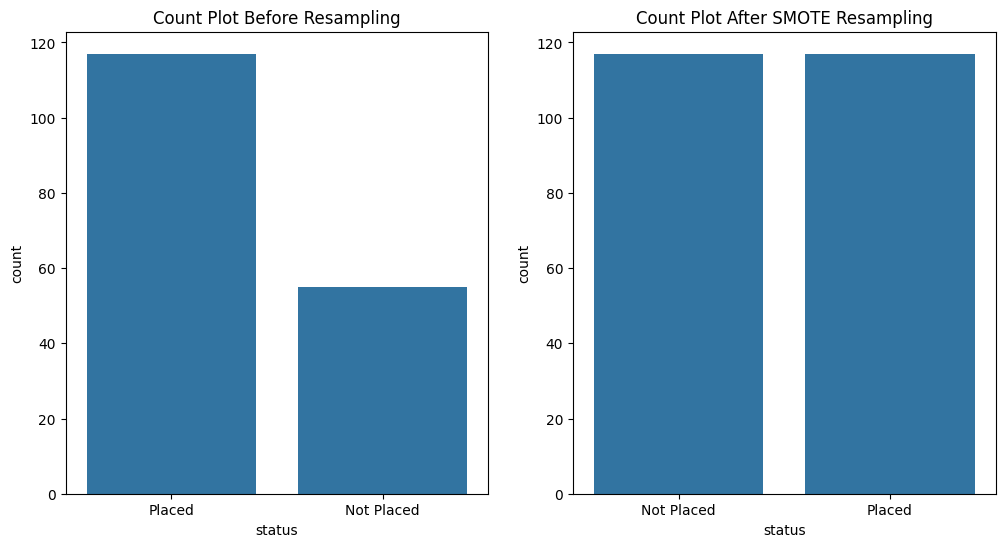

In [132]:
# plot the count plots side by side before and after resampling

# Your code goes here
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot count plots side by side before and after resampling
plt.subplot(1, 2, 1)
sns.countplot(x='status', data=pd.concat([X_train_encoded, y_train], axis=1))
plt.title('Count Plot Before Resampling')

plt.subplot(1, 2, 2)
sns.countplot(x=y_train_oversampled)
plt.title('Count Plot After SMOTE Resampling')

# Display the plots
plt.show()

As it can be seen from the above plot the the SMOTE has balanced the traning dataset by oversampling the minority class. <br>
**Q:** Are we going to oversample the testing set as well? Explain your point of view.
> **A:** No, we usually don't increase the size of the testing set artificially. We only do that with the training set to help the model learn better when some classes have more examples than others. The testing set needs to be like real-life situations, so it's important to keep its natural balance to see how well the model handles it.

The above generated oversampled dataset is only for the visualization of the functionality of the SMOTE algorithm and the machine learning model development will be done by means of imbalanced-learn pipeline (Ref: https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) along with Stratified K-Folds cross-validation (Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) and GridSearchCV (Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to avoid any data leackages during the training process. Proceed with the given instructions in the following section to implement a Support Vector Classifer in proper way.

## Machine Learning Model Development: Placement Prediction with Support Vector Classifier

In [133]:
# Make sure you have loaded the necessary libaries here or in a point before

# Your code goes here
from imblearn.pipeline import Pipeline
from sklearn.svm import SVC

In [134]:
# Define imbpipeline with following steps,
## SMOTE
## classifier (SVC in this case)

# Your code goes here
imbalanced_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', SVC(random_state=42))
])

In [135]:
# Define stratified k-fold cross validation with five folds
from sklearn.model_selection import StratifiedKFold

# Your code goes here
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

**Q:** What is the importance of Stratified K-Folds cross-validation?
> **A:** It makes sure that every group in the data has the same kinds of things as the original data.
This is really important for keeping track of the smaller groups in datasets where some groups are much bigger than others.
It stops our evaluations of the model from being unfair by keeping the same kinds of things in both the training and testing groups.

In [136]:
# Define parameter grid with two to three hyper parameters to perform grid search

# Your code goes here
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': ['scale', 'auto']
}


In [137]:
# Define grid seach instance with GridSearchCV from Scikit-Learn
from sklearn.model_selection import GridSearchCV

# Your code goes here
grid_search = GridSearchCV(imbalanced_pipeline, param_grid, scoring='accuracy', cv=stratified_kfold, n_jobs=-1)

In [138]:
# fit the grid search instance to the training data
# Do not use the upsampled train dataset before.
# Use the imbalanced dataset

# Your code goes here
grid_search.fit(X_train_encoded, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('classifier', SVC(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__gamma': ['scale', 'auto'],
                         'classifier__kernel': ['linear', 'rbf']},
             scoring='accuracy')

Hint: Refer to the GridSearchCV documentation in Scikit-Learn site to answer the following questions.

In [139]:
# Print the mean cross validated score of the best estimator (Accuracy)

# Your code goes here
print("Mean Cross-Validated Accuracy:", grid_search.best_score_)

Mean Cross-Validated Accuracy: 0.6285714285714286


In [140]:
# Print the best hyper parameters detected from the grid search

# Your code goes here
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}


In [141]:
# Obtain the best estimator selected from the grid search

# Your code goes here
best_estimator = grid_search.best_estimator_

### Model Evaluation

In [142]:
# Fit the best estimator to the whole training dataset

# Your code goes here
best_estimator.fit(X_train_encoded, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('classifier', SVC(C=10, kernel='linear', random_state=42))])

In [143]:
# Calculate the accuracy considering the complete traing set

# Your code goes here
accuracy_on_train = best_estimator.score(X_train_encoded, y_train)
accuracy_on_train

0.7034883720930233

In [144]:
# Calculate the accuracy for the test set

# Your code goes here
accuracy_on_test = best_estimator.score(X_test_encoded, y_test)
accuracy_on_test


0.627906976744186

**Q:** Comment on the accuracies obtained above. Do you think this model is overfitting or not? <br>
> **A:** No, it doesn't look like the model is fitting too closely to the training data, because the accuracy on the test data is pretty similar to the accuracy on the training data.

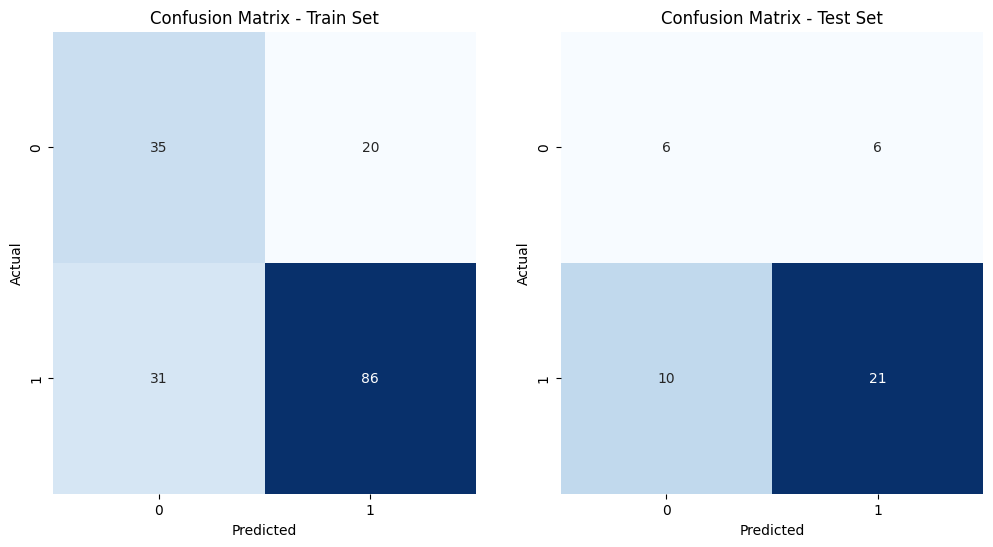

In [145]:
# Generate the confusion matrix for the train and test sets and plot them in the same figure side by side
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Your code goes here
# Calculate predictions on the training set
y_train_pred = best_estimator.predict(X_train_encoded)

# Calculate confusion matrices
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, best_estimator.predict(X_test_encoded))

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot confusion matrices side by side
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Train Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Display the plots
plt.show()


**Q:** Comment about the obtained confusion matrices. <br>
 **A:**<br> True Positive (TP): The model correctly predicts "Placed" jobs a
lot.<br>
True Negative (TN): The model correctly predicts "Not Placed" jobs somewhat.<br>
False Positive (FP): The model wrongly predicts "Placed" in some cases.<br>
False Negative (FN): The model wrongly predicts "Not Placed" in some cases.






In [146]:
# Generate the classification report from Scikit-Learn for the test set
from sklearn.metrics import classification_report

# Your code goes here
classification_rep = classification_report(y_test, best_estimator.predict(X_test_encoded))
print(classification_rep)


              precision    recall  f1-score   support

  Not Placed       0.38      0.50      0.43        12
      Placed       0.78      0.68      0.72        31

    accuracy                           0.63        43
   macro avg       0.58      0.59      0.58        43
weighted avg       0.67      0.63      0.64        43



**Q:** Comment on the results obtained with classfication report. Explain the different parameters you can observe in the report.
> **A:**<br>
**Precision:** It's about how accurate the model is when it says something is positive. For us, it's about how often the model correctly predicts "Placed" instances.<br><br>
**Recall:** It's about how good the model is at finding all the relevant positive instances. For us, it's about how many actual "Placed" instances the model predicts correctly.<br><br>
**F1-Score:** It's a way to combine precision and recall into one number, giving a balanced view of how well the model performs overall.<br><br>
**Support:** It tells us how many actual instances of a class are in the dataset.<br><br>
**Accuracy:** It's the proportion of all instances that the model classifies correctly. <br><br>

In our case, the model seems good at predicting "Placed" instances but struggles a bit with "Not Placed" ones. The overall accuracy is okay, but there's room for improvement.

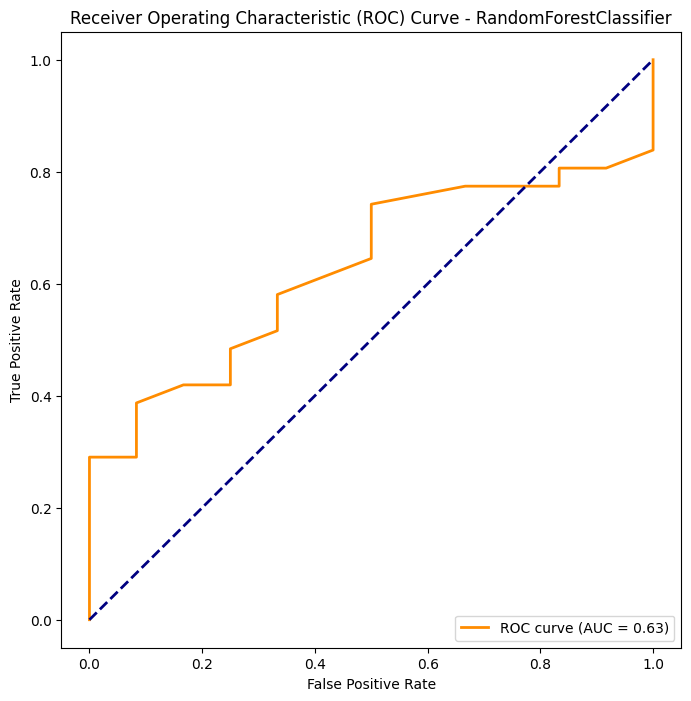

Area Under Curve (AUC) - RandomForestClassifier: 0.63


In [147]:
# Generate the ROC (Receiver Operating Curve) for the estimator considering the test data
# Also print the Area Under Curve (AUC) value asscoiated with ROC curve

# Your code goes here
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

# Define the pipeline with RandomForestClassifier
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define parameter grid for RandomForestClassifier
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Define stratified k-fold cross-validation
cv_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define grid search instance with GridSearchCV
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=cv_stratified, scoring='accuracy')

# Fit the grid search instance to the training data
grid_search_rf.fit(X_train_encoded, y_train)

# Get the best estimator from the grid search
best_estimator_rf = grid_search_rf.best_estimator_

# Calculate predicted probabilities for the positive class
y_test_probs_rf = best_estimator_rf.predict_proba(X_test_encoded)[:, 1]

# Generate ROC curve for RandomForestClassifier
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_encoded, y_test_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve for RandomForestClassifier
plt.figure(figsize=(8, 8))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - RandomForestClassifier')
plt.legend(loc='lower right')
plt.show()

# Print the AUC value for RandomForestClassifier
print('Area Under Curve (AUC) - RandomForestClassifier: {:.2f}'.format(roc_auc_rf))

**Q:** What is ROC curve and AUC value? Furthermore comment on the obtained ROC curve and AUC value. What can you tell on the estmator based on the obtained ROC curve and AUC value?
> **A:**
The ROC curve shows how well a binary classifier can tell apart the positive and negative cases at different decision thresholds. It compares how often the classifier correctly identifies positive cases (True Positive Rate) with how often it incorrectly identifies negative cases (False Positive Rate).
The AUC is a number that tells us how good the classifier is overall. It ranges from 0 to 1, where 1 is the best. A higher AUC means the classifier is better at distinguishing between positive and negative cases.
For example, if the ROC curve for a RandomForestClassifier looks okay, but not great, and the AUC is 0.63, it means the classifier can somewhat separate positive and negative cases, but there's still room for improvement. To make it better, we might need to adjust its settings or try different algorithms.